In [1]:
import sys
from descartes import PolygonPatch
import matplotlib.pyplot as plt
import alphashape
import geopandas
import numpy as np

In [17]:
concs_AR = np.loadtxt(open("AgPd_AR_125.csv", "rb"), delimiter=",", skiprows=0)
temps = np.linspace(200,900,15)

print(concs_AR.shape)

points = []
it = 0
for t in temps:
    
    for i in range(41):
        curr_point = (concs_AR[it,i]*10.0,t/100.0)
        points.append(curr_point)
    it+=1

(15, 41)


In [18]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#003f5c
#58508d
#bc5090
#ff6361
#ffa600
N = 5
newcolors = []
newcolors.append((0,63,92))
newcolors.append((88,80,141)) 
newcolors.append((188,80,144)) 
newcolors.append((255,99,97)) 
newcolors.append((255,166,0)) 

newcolors_norm = []
for i in newcolors:
    curr = np.asarray(i)
    print(curr)
    curr = curr/255.0
    curr = tuple(curr)
    newcolors_norm.append(curr)

cmap_name = 'my_list'
newcmp = LinearSegmentedColormap.from_list(cmap_name,newcolors_norm)

[ 0 63 92]
[ 88  80 141]
[188  80 144]
[255  99  97]
[255 166   0]


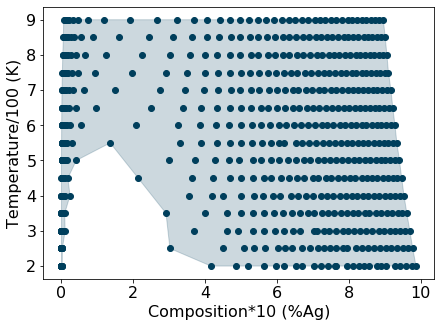

In [19]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (7,5)


ax.scatter(*zip(*points),color=newcmp(0.0))
alpha_shape = alphashape.alphashape(points,1.2)
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2,color=newcmp(0.0)))

plt.ylabel("Temperature/100 (K)",fontsize=16,fontname="Arial")
plt.xlabel("Composition*10 (%Ag)",fontsize=16,fontname="Arial")

plt.xticks(fontsize = 16,fontname = "Arial")
plt.yticks(fontsize = 16,fontname = "Arial")

#plt.savefig('alpha_shape_june6.pdf',bbox_inches='tight')


plt.show()